In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
tau_m = 10.0            # Membrane time constant
dt = 1.0                # Time step
V = 0.0                 # Initial membrane potential
V_th = 1.0              # Threshold potential
V_reset = 0.0           # Reset potential
time_steps = 200        # Number of time steps
V_trace = []            # Record changes in membrane potential over time
spike_times = []        # Record spike firing times

t = np.arange(0, time_steps * dt, dt)
input_signal = 1.5 * np.sin(2 * np.pi * t / 50) + 0.5 * np.random.randn(len(t))
# Input signal: a sinusoidal signal with an amplitude of 1.5 and a period of 50 ms,
# superimposed with random noise

for i in range(time_steps):
    I_t = max(0, input_signal[i])
    V += (dt / tau_m) * (-V + I_t)
    if V >= V_th:
        spike_times.append(i)
        V_trace.append(V)
        V = V_reset
    else:
        V_trace.append(V)
    # If the threshold is reached, record the spike time and reset the membrane potential

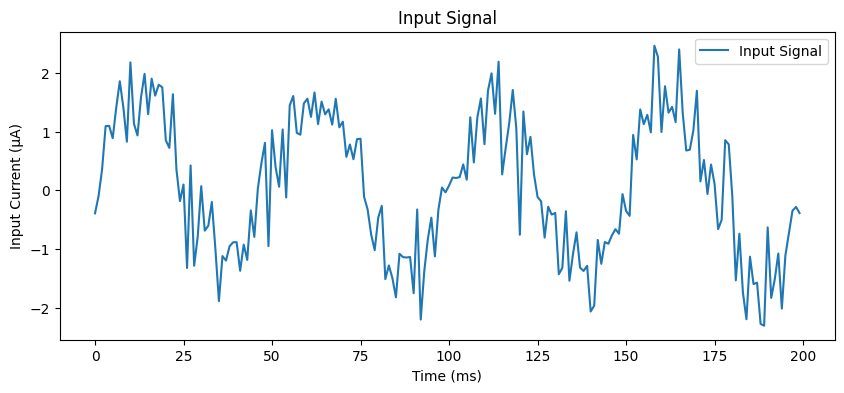

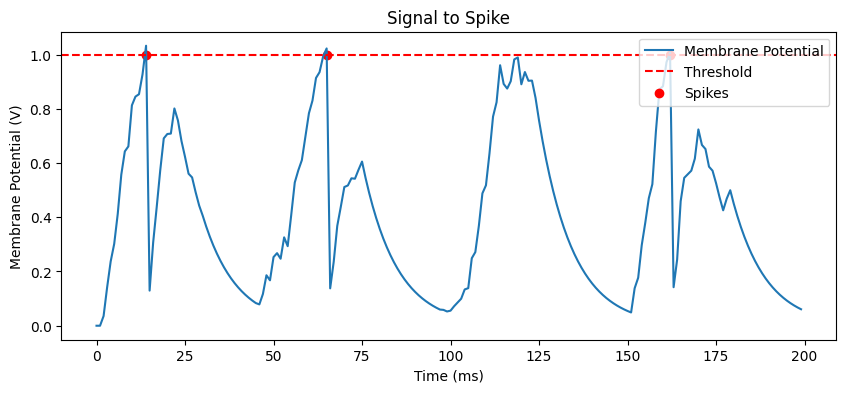

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(t, input_signal, label="Input Signal")
plt.title("Input Signal")
plt.xlabel("Time (ms)")
plt.ylabel("Input Current (μA)")

plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t, V_trace, label="Membrane Potential")
plt.axhline(y=V_th, color='r', linestyle='--', label="Threshold")
plt.scatter(spike_times, [V_th] * len(spike_times), color='red', label="Spikes")
plt.title("Signal to Spike")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (V)")

plt.legend()
plt.show()